In [2]:
import astropy.units as u
from astropy.constants import R_earth

from sunpy.net import Fido, attrs as a
from sunpy.coordinates import get_body_heliographic_stonyhurst
import sunpy.map

import numpy as np
import matplotlib.pyplot as plt
import glob

## STEREO SECCHI EUVI

### Download

In [8]:
# Define the query parameters during cruciform scan in beta direction
obs_start = "2011-01-27T16:00:00"
obs_end = "2011-01-27T17:00:00"
instrument = 'euvi'

# Construct the query  
unifresp = Fido.search(a.Time(obs_start, obs_end),
    a.Instrument(instrument),a.Wavelength(304*u.angstrom))

In [27]:
unifresp = Fido.search(a.Time(obs_start, obs_end),
                       a.Instrument(instrument),
                       a.Wavelength(304*u.angstrom))

In [28]:
type(unifresp)

sunpy.net.fido_factory.UnifiedResponse

In [29]:
unifresp

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Type,Size
,,,,Angstrom,,,,,Mibyte
Time,Time,str8,str6,float64[2],str3,str9,str6,str8,float64
2011-01-27 16:01:15.000,2011-01-27 16:01:19.000,STEREO_A,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002
2011-01-27 16:03:45.000,2011-01-27 16:03:49.000,STEREO_A,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002
2011-01-27 16:06:15.000,2011-01-27 16:06:19.000,STEREO_A,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002
2011-01-27 16:06:54.000,2011-01-27 16:06:58.000,STEREO_B,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002
2011-01-27 16:11:15.000,2011-01-27 16:11:19.000,STEREO_A,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002
2011-01-27 16:13:45.000,2011-01-27 16:13:49.000,STEREO_A,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002
2011-01-27 16:16:15.000,2011-01-27 16:16:19.000,STEREO_A,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002
2011-01-27 16:16:54.000,2011-01-27 16:16:58.000,STEREO_B,SECCHI,304.0 .. 304.0,SSC,intensity,NARROW,FULLDISK,8.02002


In [6]:
files = Fido.fetch(unifresp, path='data/{instrument}')

Files Downloaded:   0%|          | 0/28 [00:00<?, ?file/s]

20110127_160115_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_160615_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_160345_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_160615_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_161115_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_161345_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_161615_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_161615_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_161845_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_162115_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_162345_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_162615_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_162615_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_162845_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_163115_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_163345_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_163615_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_163615_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_163845_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_164115_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_164345_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_164615_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_164615_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_164845_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_165115_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_165345_n5eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_165615_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20110127_165615_n4eub.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

### read stereo files

In [3]:
stereo_files = sorted(glob.glob('data/SECCHI/201101*.fts'))

In [4]:
stereo_files

['data/SECCHI\\20110127_160115_n5eua.fts',
 'data/SECCHI\\20110127_160345_n5eua.fts',
 'data/SECCHI\\20110127_160615_n4eua.fts',
 'data/SECCHI\\20110127_160615_n4eub.fts',
 'data/SECCHI\\20110127_161115_n5eua.fts',
 'data/SECCHI\\20110127_161345_n5eua.fts',
 'data/SECCHI\\20110127_161615_n4eua.fts',
 'data/SECCHI\\20110127_161615_n4eub.fts',
 'data/SECCHI\\20110127_161845_n5eua.fts',
 'data/SECCHI\\20110127_162115_n5eua.fts',
 'data/SECCHI\\20110127_162345_n5eua.fts',
 'data/SECCHI\\20110127_162615_n4eua.fts',
 'data/SECCHI\\20110127_162615_n4eub.fts',
 'data/SECCHI\\20110127_162845_n5eua.fts',
 'data/SECCHI\\20110127_163115_n5eua.fts',
 'data/SECCHI\\20110127_163345_n5eua.fts',
 'data/SECCHI\\20110127_163615_n4eua.fts',
 'data/SECCHI\\20110127_163615_n4eub.fts',
 'data/SECCHI\\20110127_163845_n5eua.fts',
 'data/SECCHI\\20110127_164115_n5eua.fts',
 'data/SECCHI\\20110127_164345_n5eua.fts',
 'data/SECCHI\\20110127_164615_n4eua.fts',
 'data/SECCHI\\20110127_164615_n4eub.fts',
 'data/SECC

In [5]:
m_stereo=sunpy.map.Map(stereo_files)

Observatory,STEREO A
Instrument,SECCHI
Detector,EUVI
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2011-01-27 16:01:15
Exposure Time,4.00205 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[1.58777404 1.58777404] arcsec / pix
Reference Pixel,[1020.81 925.284] pix

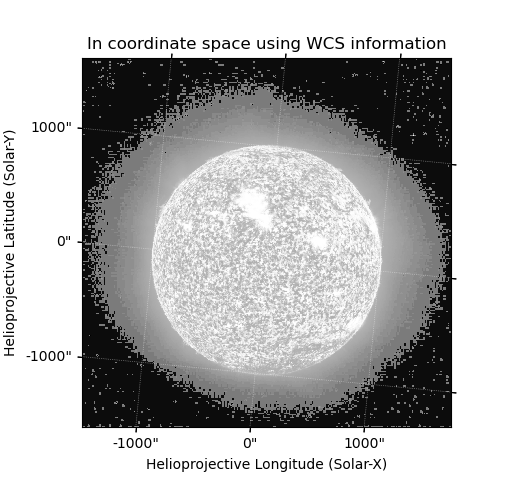
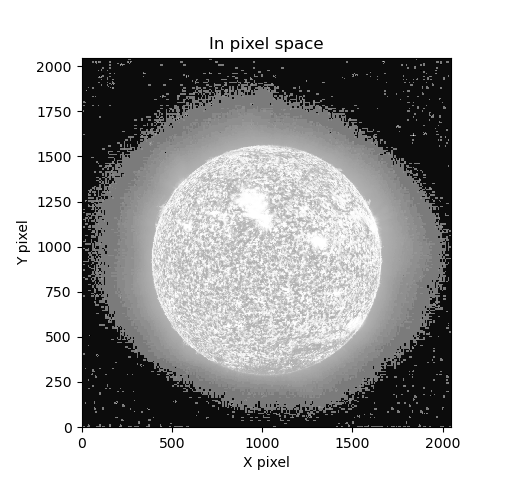
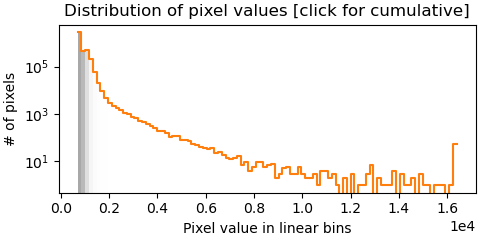
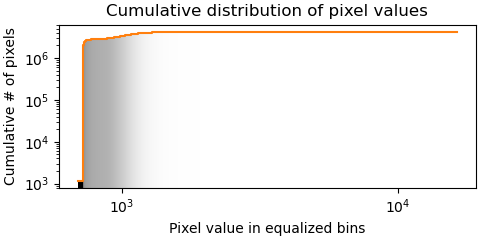

In [6]:
m_stereo[0]

In [13]:
for image in 
stereo_data.append(m_stereo[i].data)

AttributeError: 'list' object has no attribute 'data'

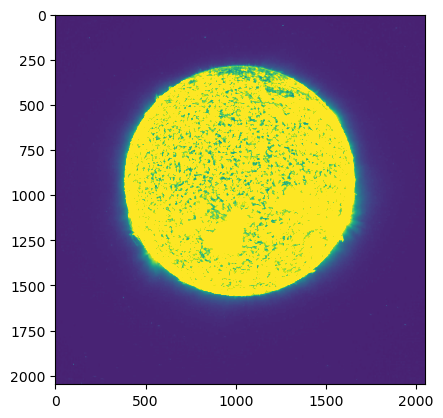

In [16]:
fig,ax=plt.subplots()
ax.imshow(m_stereo[0].data,vmax=1000)

In [21]:
m_stereo[0].meta['obsrvtry']

'STEREO_A'

In [ ]:
          # ('instrume', 'SECCHI'),
          # ('obsrvtry', 'STEREO_A'),
          # ('telescop', 'STEREO')

### stereo position

In [14]:
print(m_stereo[0].observer_coordinate)

<SkyCoord (HeliographicStonyhurst: obstime=2011-01-27T16:01:15.008, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (86.61048048, -4.88446817, 1.43937106e+11)>


In [17]:
stereo_gcrs = m_stereo[0].observer_coordinate.gcrs
sun = get_body_heliographic_stonyhurst('sun', m_stereo[0].date)

https://docs.sunpy.org/en/stable/generated/gallery/units_and_coordinates/getting_observer_location.html#sphx-glr-generated-gallery-units-and-coordinates-getting-observer-location-py

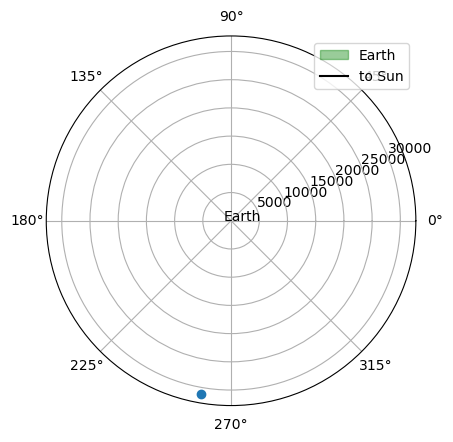

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
circle = plt.Circle((0.0, 0.0), 1, transform=ax.transProjectionAffine + ax.transAxes, color="green",
                    alpha=0.4, label="Earth")
#中间圆的半径为到  地心的距离/地球半径
ax.add_artist(circle)
ax.text(0.48, 0.5, "Earth", transform=ax.transAxes)

ax.plot(sun.lon.to('rad').value * np.ones(2), '-', label='to Sun', color='black')

ax.plot(stereo_gcrs.ra.to('rad'), stereo_gcrs.distance / R_earth,
        'o',) #label=f'SDO {stereo_gcrs.dec:.2f}')
ax.legend()

plt.show()

## Hinode